# **Location Recommendation System for Small Businesses in Large Cities**
Capstone Project
***

# Introduction
Business location is one of the most critical decisions for small businesses in large cities. Decision-makers need to consider different factors in the search for the right location for a business. These factors include financial factors, market factors, and the factors that will directly affect the demand and the revenue of the business products or services. This project can help decision-makers find the best neighborhood to open a new business (such as an ice-cream shop) in a big city.

In this proposal, I considered the case of opening an Ice Cream Shop in a large city such as Boston. This project's future extension can include creating a web interface to enable the user to use this location recommendation for some other businesses and in other cities. Also, it can get improved by including more features in decision making.

# Business Problem (case of opening an Ice Cream Shop in Boston)
Finding the best location to start a new business in a large city such as Boston is challenging. Boston has 23 neighborhoods with various places that attract tourists and people to visit. Neighborhoods of Boston are different in terms of factors that can directly or indirectly affect business success. For an informed decision, it is essential to evaluate all neighborhoods based on the factors that affect running a successful business, such as the number of competitors and the potential demand in each neighborhood. Budget limitations in renting or buying a place also play an essential role in this decision-making, especially for small businesses.  

In this project, We want to help a client find the best neighborhood in Boston to open an Ice Cream Shop. Finding a neighborhood that is close enough to some amenities and venues, has fewer competitors, and is affordable is challenging for our client. An ice cream shop is good near a place where many people visit, such as near a cinema, park, garden, playground, etc. Also, the client has a limited budget, and a neighborhood with fewer competitors is less risky for him/her to start the business. 

# Data sources for this project
## Extract the neighborhoods from the related real estate web page using BeautifulSoup:
We need to extract the 20 neighborhoods of Boston and the median one-bedroom rent price (as an estimate of the renting cost of the shop) of each neighborhood. For this purpose, We will use the following website and apply the BeautifulSoup website scraping library to extract the data.
 http://realestate.boston.com/renting/2019/02/19/median-one-bedroom-rent-price/


In [1]:
import numpy as np
import pandas as pd
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "http://realestate.boston.com/renting/2020/01/23/median-rent-every-boston-neighborhood/"
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
page = urlopen(req).read()

# create a Beautiful Soup object from the html
soup = BeautifulSoup(page,"html.parser")
type(soup)

# using right click and inspect on the webpage we found the class of the useful part of the page:
website_text = soup.find('div', {'class' :'content-text'}).text

#convert the string to list
import re
My_list= re.findall('(.+?)\n' , website_text)
# My_list


Transform the data into pandas dataframe:

In [3]:
#remove the first 3 unuseful elements of the list
del My_list[0:3]

#create a list of all the neighborhoods:
My_nb= My_list[0:125:6]

#add ', MA, USA' to the name of the neighborhoods to make sure geopy we will find correct locations
nb=[s + ', MA, USA' for s in My_nb]

# #create a list of average rent of the neighborhoods
rt=My_list[1:125:6]

#to remove the string 'Winter 2020: $' next to the rent values
My_list2=[s.replace('Winter 2020: $', '') for s in rt]

#create a panda dataframe of neighborhoods and their average rent of one-be apartment 
df_boston = pd.DataFrame({'Neighborhood':nb,'Average Rent':My_list2})

#remove 'Leather District' as geopy cannot fint its location
df_boston.drop([13], inplace=True)
df_boston


,Neighborhood,Average Rent
0,"Allston, MA, USA","2,200"
1,"Back Bay, MA, USA","3,000"
2,"Bay Village, MA, USA","2,400"
3,"Beacon Hill, MA, USA","2,400"
4,"Brighton, MA, USA","1,990"
5,"Charlestown, MA, USA","2,500"
6,"Chinatown, MA, USA","3,400"
7,"Dorchester, MA, USA","1,950"
8,"Downtown, MA, USA","3,330"
9,"East Boston, MA, USA","2,000"


In [4]:
print('We are investigating {} neighborhoods of Boston.'.format (len(df_boston)))

We are investigating 20 neighborhoods of Boston.


## Use GeopPy to get the coordinates of the neighborhoods:
Use the GeoPy Python package to get the latitude and the longitude coordinates of all the neighborhoods of Boston:

In [5]:
# pip install geopy

In [11]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')

latlon = df_boston.Neighborhood.apply(lambda addr: geolocator.geocode(addr))
df_boston["Latitude"] = [x.latitude for x in latlon]
df_boston["Longitude"] = [x.longitude for x in latlon]

df_boston.to_csv('df-boston.csv')#save the dataframe
df_boston

,Neighborhood,Average Rent,Latitude,Longitude
0,"Allston, MA, USA","2,200",42.355434,-71.132127
1,"Back Bay, MA, USA","3,000",42.350549,-71.080311
2,"Bay Village, MA, USA","2,400",41.484988,-81.920832
3,"Beacon Hill, MA, USA","2,400",42.358708,-71.067829
4,"Brighton, MA, USA","1,990",39.906998,-104.837400
5,"Charlestown, MA, USA","2,500",42.377875,-71.061996
6,"Chinatown, MA, USA","3,400",40.716491,-73.996250
7,"Dorchester, MA, USA","1,950",42.297320,-71.074495
8,"Downtown, MA, USA","3,330",34.042849,-118.247673
9,"East Boston, MA, USA","2,000",42.375097,-71.039217


## Map the neighborhoods:

In [12]:
#get location of Boston to map the neighborhoods
address = 'BOSTON, MA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Boston are 42.3602534, -71.0582912.


In [13]:
#!conda install -c conda-forge folium=0.5.0 --yes 

In [15]:
# create map of Boston using latitude and longitude values of the neighborhoods
import folium 
map_Boston = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_boston['Latitude'], df_boston['Longitude'], df_boston['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boston)  
            
map_Boston

## Use Foursquare API to get information about some venues around these neighborhoods:

Looking for Movie Theater, Playground, Park, Garden, Water Park, General Entertainment, Stadium, Amphitheater, Aquarium, Street Art, Beach, Recreation Center, and Pedestrian Plaza venues in walking distance (500 meters) from each of these neighborhood. These venues are places that many people usually visit them for entertainment and hence we will have good demand for ice cream around them. 

In [16]:
# Venue categories to search around each neighborhood
# The list of all venue categories of FourSquare can be found in the following link: https://developer.foursquare.com/docs/resources/categories. 

fs_categories = {
    
    'Movie Theater': '4bf58dd8d48988d17f941735',
    'Playground': '4bf58dd8d48988d1e7941735',
    'Park': '4bf58dd8d48988d163941735',
    'Garden': '4bf58dd8d48988d15a941735',
    'Water Park': '4bf58dd8d48988d193941735',
    'General Entertainment': '4bf58dd8d48988d1f1931735',
    'Stadium' : '4bf58dd8d48988d184941735',
    'Amphitheater' :'56aa371be4b08b9a8d5734db',
    'Aquarium' : '4fceea171983d5d06c3e9823',
    'Street Art' : '52e81612bcbc57f1066b79ee',
    'Beach' : '4bf58dd8d48988d1e2941735',
    'Recreation Center' : '52e81612bcbc57f1066b7a26',
    'Pedestrian Plaza': '52e81612bcbc57f1066b7a25'
}

', ' .join([ cat for cat in fs_categories])

'Movie Theater, Playground, Park, Garden, Water Park, General Entertainment, Stadium, Amphitheater, Aquarium, Street Art, Beach, Recreation Center, Pedestrian Plaza'

In [17]:
# Install FourSquare client library
!pip install foursquare

In [18]:
import foursquare
CLIENT_ID = '1HABFONPEEOMT0AS2GVXPK53A4EO43AXRTJVN3B03CG3N3BE'
CLIENT_SECRET = '0CR2ZL5CZHLX5OSIIJRZCBPXGCC1TIS2HQ04CUYLFBFRBG1Q' 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
fs = foursquare.Foursquare( CLIENT_ID, CLIENT_SECRET)
RADIUS = 500 

In [19]:
# Define a function to search nearby venues for the categories specified and convert the result as dataframe
def venues_nearby(latitude, longitude, category, verbose=True):    
    results = fs.venues.search(
        params = {
            'query': category, 
            'll': '{},{}'.format(latitude, longitude),
            'radius': RADIUS,
            'categoryId': fs_categories[category]
        }
    )    
    df = json_normalize(results['venues'])
    cols = ['Name','Latitude','Longitude']    
    if( len(df) == 0 ):        
        df = pd.DataFrame(columns=cols)
    else:        
        df = df[['name','location.lat','location.lng']]
        df.columns = cols
    if( verbose ):
        print('{} "{}" venues are found within {}m of location'.format(len(df), category, RADIUS))
    return df

In [20]:
# to check the spesified venue categories for all the neighborhoods
from pathlib import Path

venues_csv = Path('./boston_venues.csv')
df_venues = None

# check the venues data is explored and downloaded 
if( venues_csv.exists() ):
    df_venues = pd.read_csv('./boston_venues.csv')
else:    
    # construct a dataframe to store data
    df_venues = pd.DataFrame(columns=[ 'Category','Latitude', 'Longitude'])
    for (name, average_rent, latitude, longitude) in df_boston.itertuples(index=False):
        for cat, cat_id in fs_categories.items():
            df = venues_nearby(latitude, longitude, cat, verbose=False)
            df['Neighborhood'] = name
            df['Average Rent'] = average_rent
            df['Category'] = cat
            df_venues = df_venues.append(df, sort=True)
    df_venues.to_csv('boston_venues.csv', index=False)

In [21]:
print('In total, {} venues are found in Boston.'.format(len(df_venues)))

df_venues.head()

In total, 123 venues are found in Boston.


,Average Rent,Category,Latitude,Longitude,Name,Neighborhood
0,"2,200",Playground,42.360342,-71.133651,Thomas Gardner Elementry School Playground,"Allston, MA, USA"
1,"3,000",Playground,42.352769,-71.076530,Clarendon Street Play Lot,"Back Bay, MA, USA"
2,"3,000",Park,42.346077,-71.078372,SW Corridor Park - Back Bay,"Back Bay, MA, USA"
3,"3,000",Park,42.352001,-71.077808,Firefighters Memorial Park,"Back Bay, MA, USA"
4,"3,000",Park,42.346132,-71.074815,Childe Hassam Park,"Back Bay, MA, USA"


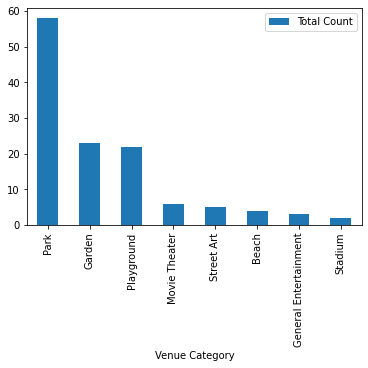

In [22]:
#number of venues from each category
import matplotlib.pyplot as plt
p= df_venues['Category'].value_counts().to_frame(name='Total Count')
p.index.name = 'Venue Category'
p.plot.bar(y='Total Count')

In [23]:
# number of venues for each neighborhood
df_groupby= df_venues.groupby('Neighborhood').count().reset_index()
df_groupby

,Neighborhood,Average Rent,Category,Latitude,Longitude,Name
0,"Allston, MA, USA",1,1,1,1,1
1,"Back Bay, MA, USA",9,9,9,9,9
2,"Beacon Hill, MA, USA",14,14,14,14,14
3,"Charlestown, MA, USA",7,7,7,7,7
4,"Chinatown, MA, USA",26,26,26,26,26
5,"Dorchester, MA, USA",3,3,3,3,3
6,"Downtown, MA, USA",6,6,6,6,6
7,"East Boston, MA, USA",3,3,3,3,3
8,"Fenway, MA, USA",11,11,11,11,11
9,"Hyde Park, MA, USA",1,1,1,1,1


In [24]:
#the dataset of all the venues from different categories in each neighborhood
boston_onehot = pd.get_dummies(df_venues[['Category']], prefix="", prefix_sep="")#one hot encoding
boston_onehot['Neighborhood'] = df_venues['Neighborhood'] 
fixed_columns = [boston_onehot.columns[-1]] + list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]
boston_onehot.head()

,Neighborhood,Beach,Garden,General Entertainment,Movie Theater,Park,Playground,Stadium,Street Art
0,"Allston, MA, USA",0,0,0,0,0,1,0,0
1,"Back Bay, MA, USA",0,0,0,0,0,1,0,0
2,"Back Bay, MA, USA",0,0,0,0,1,0,0,0
3,"Back Bay, MA, USA",0,0,0,0,1,0,0,0
4,"Back Bay, MA, USA",0,0,0,0,1,0,0,0


## Group rows by neighborhood to compare the frequency of different venue categories in each neighborhood: 

In [25]:
boston_grouped = boston_onehot.groupby('Neighborhood').sum().reset_index()
boston_grouped

,Neighborhood,Beach,Garden,General Entertainment,Movie Theater,Park,Playground,Stadium,Street Art
0,"Allston, MA, USA",0,0,0,0,0,1,0,0
1,"Back Bay, MA, USA",0,4,1,0,3,1,0,0
2,"Beacon Hill, MA, USA",1,5,0,0,5,3,0,0
3,"Charlestown, MA, USA",0,2,0,0,2,3,0,0
4,"Chinatown, MA, USA",0,3,1,3,10,4,0,5
5,"Dorchester, MA, USA",0,2,0,0,1,0,0,0
6,"Downtown, MA, USA",0,0,0,1,5,0,0,0
7,"East Boston, MA, USA",0,0,0,0,3,0,0,0
8,"Fenway, MA, USA",1,1,0,2,4,2,1,0
9,"Hyde Park, MA, USA",0,0,0,0,1,0,0,0


In [26]:
#neighborhoods without any 'Movie Theater, Playground, Park, Garden, Zoo, Water Park, General Entertainment, Stadium'venues: 
print('We will remove {} from the investigation as does not have any Movie Theater, Playground, Park, Garden, Water Park, General Entertainment, Stadium, Amphitheater, Aquarium, Street Art, Beach, Recreation Center, Pedestrian Plaza venues around.'
      .format(set(df_boston['Neighborhood']).difference(boston_grouped['Neighborhood'])))

We will remove {'Mission Hill, MA, USA', 'Roxbury, MA, USA', 'Bay Village, MA, USA', 'Mattapan, MA, USA', 'Jamaica Plain, MA, USA', 'Brighton, MA, USA'} from the investigation as does not have any Movie Theater, Playground, Park, Garden, Water Park, General Entertainment, Stadium, Amphitheater, Aquarium, Street Art, Beach, Recreation Center, Pedestrian Plaza venues around.


In [27]:
### sort venues for each neighborhood
for hood in boston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(int)
    temp = temp.round({'freq': 0})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True))
    print('\n')

----Allston, MA, USA----
                   venue  freq
0             Playground     1
1                  Beach     0
2                 Garden     0
3  General Entertainment     0
4          Movie Theater     0
5                   Park     0
6                Stadium     0
7             Street Art     0


----Back Bay, MA, USA----
                   venue  freq
0                 Garden     4
1                   Park     3
2  General Entertainment     1
3             Playground     1
4                  Beach     0
5          Movie Theater     0
6                Stadium     0
7             Street Art     0


----Beacon Hill, MA, USA----
                   venue  freq
0                 Garden     5
1                   Park     5
2             Playground     3
3                  Beach     1
4  General Entertainment     0
5          Movie Theater     0
6                Stadium     0
7             Street Art     0


----Charlestown, MA, USA----
                   venue  freq
0             Pla

In [28]:
#a function to sort the venues in decrising order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
#find top 5 most common venues around each neighborhood
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues

columns =[ 'Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)

neighborhoods_venues_sorted['Neighborhood'] = boston_grouped['Neighborhood']


for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)

#neighborhoods_venues_sorted['Average Rent'] = df_boston_nj['Average Rent']
neighborhoods_venues_sorted['# of venues']= df_groupby['Category']

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues
0,"Allston, MA, USA",Playground,Street Art,Stadium,Park,Movie Theater,1
1,"Back Bay, MA, USA",Garden,Park,Playground,General Entertainment,Street Art,9
2,"Beacon Hill, MA, USA",Park,Garden,Playground,Beach,Street Art,14
3,"Charlestown, MA, USA",Playground,Park,Garden,Street Art,Stadium,7
4,"Chinatown, MA, USA",Park,Street Art,Playground,Movie Theater,Garden,26
5,"Dorchester, MA, USA",Garden,Park,Street Art,Stadium,Playground,3
6,"Downtown, MA, USA",Park,Movie Theater,Street Art,Stadium,Playground,6
7,"East Boston, MA, USA",Park,Street Art,Stadium,Playground,Movie Theater,3
8,"Fenway, MA, USA",Park,Playground,Movie Theater,Stadium,Garden,11
9,"Hyde Park, MA, USA",Park,Street Art,Stadium,Playground,Movie Theater,1


## Looking for Ice cream shops within walking distance (500 meters) of each of the neighborhoods to get an understanding of the competitors in each neighborhood:

In [30]:
# Ice cream shop category in FourSquare
fs_categories = {
    'Ice Cream Shop': ' 4bf58dd8d48988d1c9941735',
}

In [31]:
# check Ice cream shop venue for all the neighborhoods
from pathlib import Path

venues_csv = Path('./boston_ic_cream.csv')
df_venues = None
if( venues_csv.exists() ):
    df_venues = pd.read_csv('./boston_ic_creams.csv')
else:    
    # construct a dataframe to store data
    df_venues = pd.DataFrame(columns=[ 'Category','Latitude', 'Longitude'])
    for (name, average_rent, latitude, longitude) in df_boston.itertuples(index=False):
        for cat, cat_id in fs_categories.items():
            df = venues_nearby(latitude, longitude, cat, verbose=False)
            df['Neighborhood'] = name
            df['Average Rent'] = average_rent
            df['Category'] = cat
            df_venues = df_venues.append(df, sort=True)
    df_venues.to_csv('boston__ic_cream.csv', index=False)
   
print('Total {} Ice Cream Shop are found in Boston Area.'.format(len(df_venues)))

Total 33 Ice Cream Shop are found in Boston Area.


In [32]:
#number of Ice cream shops within walking distance of each of the neighborhoods
boston_onehot_ic = pd.get_dummies(df_venues[['Category']], prefix="", prefix_sep="")#one hot encoding
boston_onehot_ic['Neighborhood'] = df_venues['Neighborhood'] # add neighborhood column back to dataframe
fixed_columns = [boston_onehot_ic.columns[-1]] + list(boston_onehot_ic.columns[:-1])
boston_onehot_ic = boston_onehot_ic[fixed_columns]
boston_grouped_ic = boston_onehot_ic.groupby('Neighborhood').sum().reset_index()
boston_icecreamshops = pd.merge(df_boston, boston_grouped_ic, on=['Neighborhood'], how='outer').fillna(0)
boston_icecreamshops 

,Neighborhood,Average Rent,Latitude,Longitude,Ice Cream Shop
0,"Allston, MA, USA","2,200",42.355434,-71.132127,2.0
1,"Back Bay, MA, USA","3,000",42.350549,-71.080311,1.0
2,"Bay Village, MA, USA","2,400",41.484988,-81.920832,0.0
3,"Beacon Hill, MA, USA","2,400",42.358708,-71.067829,3.0
4,"Brighton, MA, USA","1,990",39.906998,-104.837400,0.0
5,"Charlestown, MA, USA","2,500",42.377875,-71.061996,1.0
6,"Chinatown, MA, USA","3,400",40.716491,-73.996250,19.0
7,"Dorchester, MA, USA","1,950",42.297320,-71.074495,0.0
8,"Downtown, MA, USA","3,330",34.042849,-118.247673,1.0
9,"East Boston, MA, USA","2,000",42.375097,-71.039217,0.0


In [33]:
#add the number of ice cream shops to the dataframe of all the neighborhoods with the list of 5 most common venues
df_neighborhoods = pd.merge(neighborhoods_venues_sorted, boston_icecreamshops, on=['Neighborhood'], how='inner')
df_neighborhoods

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Average Rent,Latitude,Longitude,Ice Cream Shop
0,"Allston, MA, USA",Playground,Street Art,Stadium,Park,Movie Theater,1,"2,200",42.355434,-71.132127,2.0
1,"Back Bay, MA, USA",Garden,Park,Playground,General Entertainment,Street Art,9,"3,000",42.350549,-71.080311,1.0
2,"Beacon Hill, MA, USA",Park,Garden,Playground,Beach,Street Art,14,"2,400",42.358708,-71.067829,3.0
3,"Charlestown, MA, USA",Playground,Park,Garden,Street Art,Stadium,7,"2,500",42.377875,-71.061996,1.0
4,"Chinatown, MA, USA",Park,Street Art,Playground,Movie Theater,Garden,26,"3,400",40.716491,-73.996250,19.0
5,"Dorchester, MA, USA",Garden,Park,Street Art,Stadium,Playground,3,"1,950",42.297320,-71.074495,0.0
6,"Downtown, MA, USA",Park,Movie Theater,Street Art,Stadium,Playground,6,"3,330",34.042849,-118.247673,1.0
7,"East Boston, MA, USA",Park,Street Art,Stadium,Playground,Movie Theater,3,"2,000",42.375097,-71.039217,0.0
8,"Fenway, MA, USA",Park,Playground,Movie Theater,Stadium,Garden,11,"2,440",42.345187,-71.104599,2.0
9,"Hyde Park, MA, USA",Park,Street Art,Stadium,Playground,Movie Theater,1,"1,800",41.784723,-73.933246,0.0


# Methodology

To start a new business, we need to select neighborhoods with fewer competitors. For this purpose, we will remove the neighborhoods with more than one ice cream shop. We will use K-means clustering to classify the neighborhoods based on the nearby venues and their frequencies (except the ice cream shop category). To decide, we will sort the neighborhoods in each cluster based on their average rent price. A neighborhood with venues, no ice cream shop, and a lower price will be the best option.

## Select neighborhoods with fewer competitors
We remove neighborhoods with more than one ice cream shop:

In [34]:
low_competitor=df_neighborhoods[df_neighborhoods['Ice Cream Shop'] < 2]
low_competitor

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Average Rent,Latitude,Longitude,Ice Cream Shop
1,"Back Bay, MA, USA",Garden,Park,Playground,General Entertainment,Street Art,9,"3,000",42.350549,-71.080311,1.0
3,"Charlestown, MA, USA",Playground,Park,Garden,Street Art,Stadium,7,"2,500",42.377875,-71.061996,1.0
5,"Dorchester, MA, USA",Garden,Park,Street Art,Stadium,Playground,3,"1,950",42.297320,-71.074495,0.0
6,"Downtown, MA, USA",Park,Movie Theater,Street Art,Stadium,Playground,6,"3,330",34.042849,-118.247673,1.0
7,"East Boston, MA, USA",Park,Street Art,Stadium,Playground,Movie Theater,3,"2,000",42.375097,-71.039217,0.0
9,"Hyde Park, MA, USA",Park,Street Art,Stadium,Playground,Movie Theater,1,"1,800",41.784723,-73.933246,0.0
10,"Longwood Medical Area, MA, USA",Park,Playground,Garden,Street Art,Stadium,11,"2,440",42.336177,-71.099545,1.0
12,"Roslindale, MA, USA",Playground,Street Art,Stadium,Park,Movie Theater,2,"1,650",42.291209,-71.124497,0.0
13,"South Boston, MA, USA",Park,Beach,Stadium,Street Art,Playground,6,"2,600",42.333431,-71.049495,0.0


## Cluster the neighborhoods: 
Run k-means to cluster the neighborhood into 5 clusters based on the frequency of different venue categories (except ice-cream shop) around them

In [35]:
# different categories for neighborhoods with less than 2 ice-cream shops
boston_grouped_reduced= boston_grouped[boston_grouped.index.isin(low_competitor.index)]
boston_grouped_reduced

,Neighborhood,Beach,Garden,General Entertainment,Movie Theater,Park,Playground,Stadium,Street Art
1,"Back Bay, MA, USA",0,4,1,0,3,1,0,0
3,"Charlestown, MA, USA",0,2,0,0,2,3,0,0
5,"Dorchester, MA, USA",0,2,0,0,1,0,0,0
6,"Downtown, MA, USA",0,0,0,1,5,0,0,0
7,"East Boston, MA, USA",0,0,0,0,3,0,0,0
9,"Hyde Park, MA, USA",0,0,0,0,1,0,0,0
10,"Longwood Medical Area, MA, USA",0,1,0,0,7,3,0,0
12,"Roslindale, MA, USA",0,0,0,0,0,2,0,0
13,"South Boston, MA, USA",2,0,0,0,3,0,1,0


In [36]:
from sklearn.cluster import KMeans
kclusters = 5 # set number of clusters

boston_grouped_clustering = boston_grouped_reduced.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)

# find cluster labels generated for each row of boston_grouped dataframe (neghborhoods of boston excep Jamaica Plain and Mattapan)
kmeans.labels_[0:15] 

array([1, 4, 3, 0, 0, 3, 2, 3, 0])

In [37]:
#to add the clusters to the dataframe
low_competitor.insert(0, 'Cluster Label', kmeans.labels_)# add clustering labels

In [38]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
boston_merged = pd.merge(df_boston, low_competitor, on=['Neighborhood', 'Average Rent','Latitude','Longitude'], how='inner')
boston_merged

,Neighborhood,Average Rent,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
0,"Back Bay, MA, USA","3,000",42.350549,-71.080311,1,Garden,Park,Playground,General Entertainment,Street Art,9,1.0
1,"Charlestown, MA, USA","2,500",42.377875,-71.061996,4,Playground,Park,Garden,Street Art,Stadium,7,1.0
2,"Dorchester, MA, USA","1,950",42.297320,-71.074495,3,Garden,Park,Street Art,Stadium,Playground,3,0.0
3,"Downtown, MA, USA","3,330",34.042849,-118.247673,0,Park,Movie Theater,Street Art,Stadium,Playground,6,1.0
4,"East Boston, MA, USA","2,000",42.375097,-71.039217,0,Park,Street Art,Stadium,Playground,Movie Theater,3,0.0
5,"Hyde Park, MA, USA","1,800",41.784723,-73.933246,3,Park,Street Art,Stadium,Playground,Movie Theater,1,0.0
6,"Longwood Medical Area, MA, USA","2,440",42.336177,-71.099545,2,Park,Playground,Garden,Street Art,Stadium,11,1.0
7,"Roslindale, MA, USA","1,650",42.291209,-71.124497,3,Playground,Street Art,Stadium,Park,Movie Theater,2,0.0
8,"South Boston, MA, USA","2,600",42.333431,-71.049495,0,Park,Beach,Stadium,Street Art,Playground,6,0.0


## Map the clustered neighborhoods

In [39]:
#visualize the clustered neighborhoods of boston
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Matplotlib and associated plotting modules
import folium 
from folium.features import CustomIcon
from folium.plugins import MarkerCluster
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Neighborhood'], boston_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Results
The result of 5 clusters are specified in this section. The neighborhoods in each cluster are sorted based on their average rent price:

 **Cluster 1:**

In [40]:
cluster1= boston_merged.loc[boston_merged['Cluster Label'] == 0]
cols = [0,1,5,6,7,8,9,10,11]
cluster1[cluster1.columns[cols]]

,Neighborhood,Average Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
3,"Downtown, MA, USA","3,330",Park,Movie Theater,Street Art,Stadium,Playground,6,1.0
4,"East Boston, MA, USA","2,000",Park,Street Art,Stadium,Playground,Movie Theater,3,0.0
8,"South Boston, MA, USA","2,600",Park,Beach,Stadium,Street Art,Playground,6,0.0


 **Cluster 2:**

In [41]:
cluster2=boston_merged.loc[boston_merged['Cluster Label'] == 1]
cluster2[cluster2.columns[cols]].sort_values(['Average Rent'], ascending=True) #sort the neighborhoods in the cluster based on their average rent

,Neighborhood,Average Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
0,"Back Bay, MA, USA","3,000",Garden,Park,Playground,General Entertainment,Street Art,9,1.0


 **Cluster 3:**

In [42]:
cluster3=boston_merged.loc[boston_merged['Cluster Label'] == 2]
cluster3[cluster3.columns[cols]].sort_values(['Average Rent'], ascending=True) #sort the neighborhoods in the cluster based on their average rent

,Neighborhood,Average Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
6,"Longwood Medical Area, MA, USA","2,440",Park,Playground,Garden,Street Art,Stadium,11,1.0


**Cluster 4:**

In [43]:
cluster4=boston_merged.loc[boston_merged['Cluster Label'] == 3]
cluster4[cluster4.columns[cols]].sort_values(['Average Rent'], ascending=True)  #sort the neighborhoods in the cluster based on their average rent

,Neighborhood,Average Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
7,"Roslindale, MA, USA","1,650",Playground,Street Art,Stadium,Park,Movie Theater,2,0.0
5,"Hyde Park, MA, USA","1,800",Park,Street Art,Stadium,Playground,Movie Theater,1,0.0
2,"Dorchester, MA, USA","1,950",Garden,Park,Street Art,Stadium,Playground,3,0.0


**Cluster 5:**

In [44]:
cluster5=boston_merged.loc[boston_merged['Cluster Label'] == 4]
cluster5[cluster5.columns[cols]].sort_values(['Average Rent'], ascending=True)  #sort the neighborhoods in the cluster based on their average rent

,Neighborhood,Average Rent,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,# of venues,Ice Cream Shop
1,"Charlestown, MA, USA","2,500",Playground,Park,Garden,Street Art,Stadium,7,1.0
